In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [4]:
means = [[2, 2],[8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 50
x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((x0, x1, x2),axis=0)
k= 3
print(X)
original_label = np.asarray([0]*N+[1]*N+[2]*N).T
print(original_label)

[[ 1.36900619  2.55232527]
 [ 2.72222362  1.25496931]
 [ 1.09710962  1.61945811]
 [ 1.81516246  2.1837045 ]
 [ 3.5221038   3.04844727]
 [ 3.72626505  3.5032225 ]
 [ 0.74332355  2.35240334]
 [ 0.43168877  1.23208761]
 [ 2.28781835  0.47012282]
 [ 2.23742799  3.2450527 ]
 [ 2.04339416  2.82684287]
 [ 3.51672581  4.22006836]
 [ 2.33176795  0.97433992]
 [ 2.68611565  1.75195371]
 [ 3.04548692  2.48254273]
 [ 2.99671737  3.85182926]
 [ 1.36581519  1.44265851]
 [ 2.44184308  2.57045628]
 [ 3.10400216  1.26958876]
 [ 1.3028815   2.44039215]
 [ 1.13438235  2.89014423]
 [ 1.5989523   1.1323046 ]
 [ 0.56609154  2.11296583]
 [ 2.11310019  2.26475965]
 [ 3.12290211 -0.66929619]
 [ 2.80585322  1.01716696]
 [ 0.34215968  0.22131585]
 [ 2.85101523  1.91029543]
 [ 3.12355156  2.06576038]
 [ 3.16605874  1.10011678]
 [ 3.34633641  1.10851069]
 [ 2.63559259  2.78648944]
 [ 3.06197157  1.71221621]
 [ 1.10169743  0.52487459]
 [ 0.93393078  1.72023222]
 [ 4.18665391  1.52686211]
 [ 2.69437622  1.36258453]
 

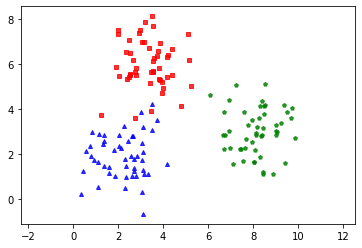

In [5]:
def kmeans_display(x, label):
    x0 = x[label == 0, :]
    x1 = x[label == 1, :]
    x2 = x[label == 2, :]
    plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(x1[:, 0], x1[:, 1], 'gp', markersize = 4, alpha = .8)
    plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X, original_label)

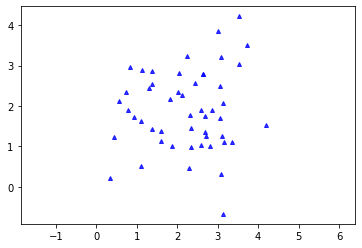

In [6]:
    plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

[[4.77025259 4.11672067]
 [2.92440268 7.38115612]
 [1.2306743  3.73170502]]


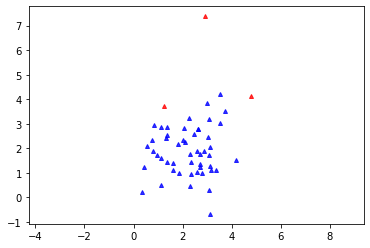

In [8]:
def kmeans_init_centers(x, k):
    init_center = X[np.random.choice(X.shape[0], k, replace=False)]
    return init_center
init_center = kmeans_init_centers(X, k)
print(init_center)
plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(init_center[:, 0], init_center[:, 1], 'r^', markersize = 4, alpha = .8)
plt.axis('equal')
plt.plot()
plt.show()

[[3.7437695  5.07315145 1.18746466]
 [3.51909698 6.12952211 2.891183  ]
 [4.44165506 6.0445152  2.11646558]
 [3.53116259 5.31450066 1.65466976]
 [1.64288875 4.37374126 2.39112742]
 [1.21090461 3.95996874 2.50602823]
 [4.39647281 5.48137399 1.46286838]
 [5.21001382 6.63510861 2.62420752]
 [4.41136664 6.94028969 3.42862538]
 [2.67862008 4.19276589 1.11820547]
 [3.01654466 4.63874393 1.21626028]
 [1.25777985 3.21610363 2.33763347]
 [3.97753241 6.43416737 2.96908564]
 [3.1521024  5.63424356 2.45717821]
 [2.37599541 4.90010965 2.20316846]
 [1.79320792 3.53006764 1.77012371]
 [4.32906485 6.13962123 2.29303227]
 [2.79507145 4.83484195 1.67792385]
 [3.29887111 6.11420572 3.09376369]
 [3.85132959 5.20004612 1.29333013]
 [3.83719197 4.83460036 0.84705177]
 [4.35475428 6.38787633 2.62535925]
 [4.6572528  5.77195465 1.74985337]
 [3.23886069 5.1803209  1.71190075]
 [5.06159273 8.05289913 4.7905467 ]
 [3.66961825 6.36509325 3.13845591]
 [5.89764237 7.61126084 3.62108966]
 [2.92434341 5.47135289 2.43

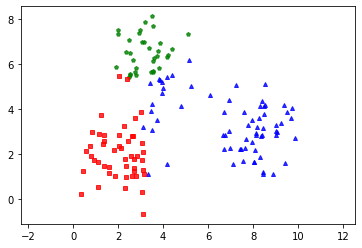

In [9]:
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    print(D)
    
    return np.argmin(D, axis = 1)
new_label = kmeans_assign_labels(X, init_center)
#print(new_label)
kmeans_display(X, new_label)

In [10]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [20]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [23]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

[[3.71607616 4.51416251 3.69546038]
 [5.83138866 6.78148006 5.54034214]
 [4.6546886  5.63460857 4.33215586]
 [4.79663292 5.5152472  4.83007458]
 [3.52661993 4.14446225 3.71012925]
 [4.88084727 5.53835132 4.97555051]
 [5.06067406 5.99913132 4.80177455]
 [3.59333399 4.55215645 3.34060982]
 [4.26726585 5.25313253 3.94236808]
 [3.94793021 4.74632764 3.91731198]
 [5.0569423  5.9947318  4.79919708]
 [4.00488201 4.91165332 3.82368369]
 [3.37601093 4.01360899 3.54830917]
 [3.87393635 4.86193355 3.55581371]
 [5.74077713 6.54452219 5.65517092]
 [4.19505794 5.14651875 3.93521143]
 [7.01486517 7.84476007 6.87793197]
 [4.96512425 5.57079188 5.10786145]
 [3.17840721 4.06410023 3.06552038]
 [4.79309522 5.68690386 4.6085445 ]
 [4.84900113 5.89108703 4.38547539]
 [4.01260864 4.78007893 4.0166816 ]
 [5.42913032 6.36836938 5.16210243]
 [6.29747793 7.23466663 6.02076962]
 [3.83277982 4.59937607 3.84511228]
 [5.67670282 6.62200305 5.39581452]
 [4.26426839 5.04390809 4.24485484]
 [5.92892144 6.69836229 5.88

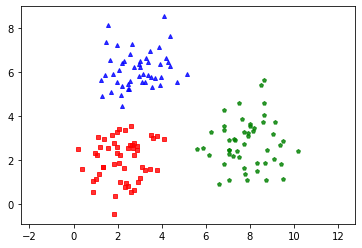

In [25]:
(centers, labels, it) = kmeans(X, k)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[2.19127176 2.0296689 ]
 [7.86079383 2.78640925]
 [2.91173893 6.12606028]]


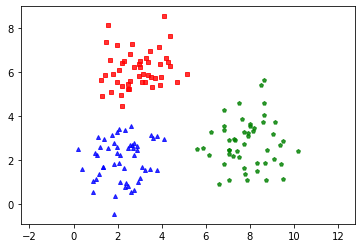

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)


In [20]:
a = np.array([[1, 2],[4,5]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
np.concatenate

array([[1, 2],
       [4, 5],
       [5, 6]])